# Project 1 - Group 72
### Matteo Boglioni - Federica Bruni - Paula Momo Cabrera

## Part 1

### Import Libraries and Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.neural_network import MLPClassifier

In [20]:
train_df = pd.read_csv("datasets/heart_failure/train_val_split.csv")
test_df = pd.read_csv("datasets/heart_failure/test_split.csv")

### Q1

In [21]:
print(train_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     37   M           ATA        130          283          0         ST   
2     48   F           ASY        138          214          0     Normal   
3     54   M           NAP        150          195          0     Normal   
4     39   M           NAP        120          339          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
729   41   M           ATA        120          157          0     Normal   
730   57   F           ASY        140          241          0     Normal   
731   45   M            TA        110          264          0     Normal   
732   68   M           ASY        144          193          1     Normal   
733   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

| Variable          | Explanation   | 
|:-----------------:|:-------------:|
|  Age              |  Intituively, with age progression follows higher risks               |
|  Sex              |  Male population is generally more sensible to heart diseases         |
|  ChestPainType    |  TA: typical angina, classic chest pain. <br> ATA: atypical angina.<br>      NAP: non-anginal pain <br> ASY: asymptomatic,common for diabetes patients to be  <br> asymptomatic even during heart attacks (due to neuropathy)|
|  RestingBP        |  Resting BloodPressure, symptom of hypertension if too high. Increases stroke risks       |
|  Cholesterol      |  High cholesterol levels increase predisposition to atherosclerosis-->leads to ACS        |
|  FastingBS        |  Fasting blood sugar, over 126 it's automatically a diagnose of diabetes                  |
|  RestingECG       |  Normal: all looks good. ST: potential disturbances in rhythm, LVH: left ventricle hypertrophy.|
|  MaxHR            |  Higher heart rates can be symptom of heart failure                                       |
|  ExerciseAngina   |  Angina during exercise, symptom of ischemia                                              |
|  Oldpeak          |  ST depression induced by exercise relative to rest                                       |
|  ST_Slope         |               |

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex']) 
test_df['Sex'] = label_encoder.transform(test_df['Sex'])
train_df['ChestPainType'] = label_encoder.fit_transform(train_df['ChestPainType'])
test_df['ChestPainType'] = label_encoder.transform(test_df['ChestPainType'])
train_df['FastingBS'] = label_encoder.fit_transform(train_df['FastingBS'])
test_df['FastingBS'] = label_encoder.transform(test_df['FastingBS'])
train_df['RestingECG'] = label_encoder.fit_transform(train_df['RestingECG'])
test_df['RestingECG'] = label_encoder.transform(test_df['RestingECG'])
train_df['ExerciseAngina'] = label_encoder.fit_transform(train_df['ExerciseAngina'])
test_df['ExerciseAngina'] = label_encoder.transform(test_df['ExerciseAngina'])
train_df['ST_Slope'] = label_encoder.fit_transform(train_df['ST_Slope'])
test_df['ST_Slope'] = label_encoder.transform(test_df['ST_Slope'])

print(train_df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     37    1              1        130          283          0           2   
2     48    0              0        138          214          0           1   
3     54    1              2        150          195          0           1   
4     39    1              2        120          339          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
729   41    1              1        120          157          0           1   
730   57    0              0        140          241          0           1   
731   45    1              3        110          264          0           1   
732   68    1              0        144          193          1           1   
733   57    1              0        130          131          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [54]:
model = MLPClassifier(activation='logistic',hidden_layer_sizes=(20,),solver='adam',max_iter=300,random_state=25).fit(train_df.iloc[:, :-1],train_df.iloc[:,-1])
print(model.score(test_df.iloc[:,:-1], test_df.iloc[:,-1]))
explainer = shap.KernelExplainer(model.predict,train_df.iloc[:, :-1])
shap_values = explainer.shap_values(test_df.iloc[:,:-1])



/home/ilboglions/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


0.8315217391304348


  0%|          | 0/184 [00:00<?, ?it/s]

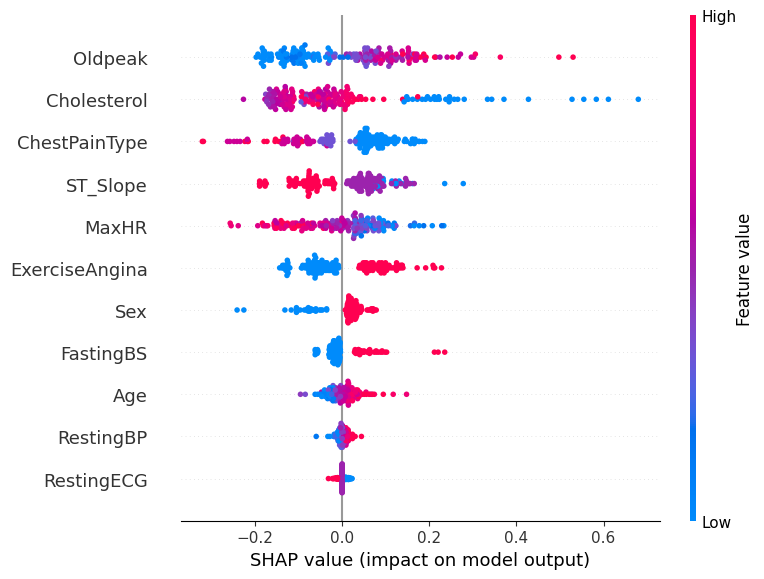

In [48]:
shap.summary_plot(shap_values,test_df.iloc[:,:-1],feature_names=train_df.columns.values)

[[ 0.02135568  0.02264834  0.06795672 ...  0.07050419  0.18708922
   0.05030069]
 [ 0.0079541   0.01387188  0.04084249 ...  0.04258712  0.07168945
   0.02966975]
 [ 0.05452589 -0.07790566  0.16076697 ...  0.12863871  0.13650872
   0.08499387]
 ...
 [-0.02727725  0.0108234  -0.07746431 ... -0.04562907 -0.09185977
  -0.05635471]
 [-0.03212629  0.06666863  0.17692338 ...  0.2083499  -0.07795692
  -0.07265547]
 [-0.01081647  0.03095076  0.08153032 ... -0.12486106  0.01730083
  -0.17716416]]


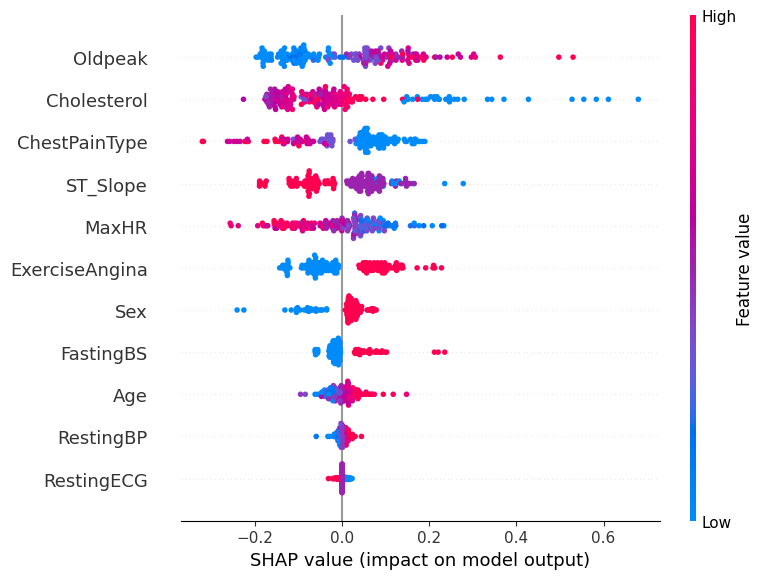

In [51]:
print(shap_values)
shap.summary_plot(shap_values,test_df.iloc[:,:-1],feature_names=train_df.columns.values)